In [17]:
import minisom
import pandas as pd
import sklearn
import matplotlib
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot
import matplotlib.pyplot as plt

In [18]:
base = pd.read_csv('datasets/credit_data.csv')
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [19]:
base.isna().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [20]:
base = base.dropna()
base.shape

(1997, 5)

In [21]:
base.loc[base['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [22]:
base['age'].mean()

40.80755937840458

In [23]:
base.loc[base['age'] > 0].mean()

clientid     1003.431795
income      45328.856915
age            40.927700
loan         4443.240892
default         0.141926
dtype: float64

In [24]:
base.loc[base['age'] < 0, ['age']] = 40.92

In [25]:
X = base.iloc[:, 0:4].values
y = base.iloc[:, 4].values

In [26]:
X

array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [27]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
normalizador = MinMaxScaler(feature_range=(0, 1))
X = normalizador.fit_transform(X)

In [29]:
X

array([[0.00000000e+00, 9.23175898e-01, 8.92091749e-01, 5.88837391e-01],
       [5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01],
       [1.00050025e-03, 7.46334292e-01, 9.81188803e-01, 5.82620111e-01],
       ...,
       [9.98999500e-01, 4.86122016e-01, 2.16958067e-01, 4.01128949e-01],
       [9.99499750e-01, 4.75009983e-01, 1.00000000e+00, 1.17790295e-01],
       [1.00000000e+00, 9.88813673e-01, 8.29709134e-01, 5.35970280e-01]])

In [30]:
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

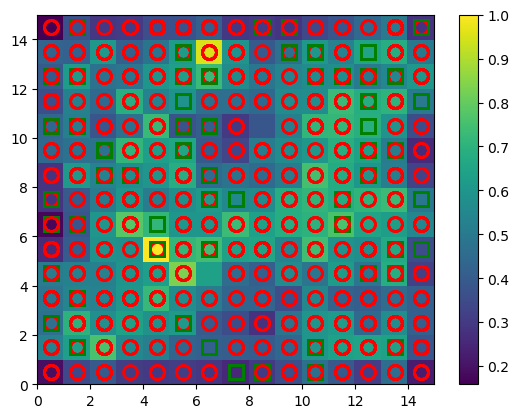

In [32]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]],
         markerfacecolor='None',
         markeredgecolor=colors[y[i]], markeredgewidth=2, markersize=10)